<a href="https://colab.research.google.com/github/fzanart/GHDomains/blob/main/Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install -U sentence-transformers
!pip install flaml

In [2]:
from sentence_transformers import SentenceTransformer
from flaml import AutoML
import numpy as np
import pandas as pd
from google.colab import drive
from sklearn.metrics import classification_report, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
import matplotlib.pyplot as plt
import markdown
import lxml
from bs4 import BeautifulSoup
import re
import time
import pickle
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
#Imports:

# Clasification model
with open('/content/drive/MyDrive/GHDomains/Resources/automl.pkl', 'rb') as fp:
  automl = pickle.load(fp)
# Label encoder
with open('/content/drive/MyDrive/GHDomains/Resources/label_encoder.pkl', 'rb') as fp:
  le = pickle.load(fp)
# Num scaler
with open('/content/drive/MyDrive/GHDomains/Resources/num_scaler.pkl', 'rb') as fp:
  scaler = pickle.load(fp)
# Column names
with open('/content/drive/MyDrive/GHDomains/Resources/column_names.pkl', 'rb') as fp:
  column_names = pickle.load(fp)

In [ ]:
new_popular_df = pd.read_csv('/content/drive/MyDrive/GHDomains/New_popular_download/all_repos.csv')
new_popular_df = new_popular_df.rename(columns={"README": "Readme"}) 
new_popular_df

,Name,Description,Readme,Labels,Contributors,Languages,Topics,Contents,Licence,Stars,Forks,Releases,Workflows
0,vuejs/devtools,⚙️ Browser devtools extension for debugging Vu...,# vue-devtools\n\n![screenshot](./media/screen...,"['accepted proposition', 'bug', 'cannot reprod...","['Akryum', 'yyx990803', 'posva', 'bartlomieju'...","['TypeScript', 'Vue', 'JavaScript', 'HTML', 'S...",NaN,"['.browserslistrc', '.circleci', '.eslintrc.js...",MIT License,22091,3684,73,['Create Release']
1,futurice/android-best-practices,"Do's and Don'ts for Android development, by Fu...",# Best practices in Android development\n\nAvo...,"['2018', 'answered', 'bug', 'discussion', 'dup...","['staltz', 'peter-tackage', 'minsoopark', 'and...",NaN,"['best-practices', 'android-development', 'and...","['LICENSE', 'README.md', 'translations']",Other,19943,3305,0,NaN
2,microsoft/Web-Dev-For-Beginners,"24 Lessons, 12 Weeks, Get Started as a Web Dev...",[![GitHub license](https://img.shields.io/gith...,"['bug', 'dependencies', 'documentation', 'dupl...","['jlooper', 'ManuSquall', 'San1ay', 'silversky...","['JavaScript', 'HTML', 'CSS', 'Vue']","['javascript', 'curriculum', 'html', 'css', 'e...","['.github', '.gitignore', '.nojekyll', '1-gett...",MIT License,44328,6279,0,"['Azure Static Web Apps CI/CD', 'Lock closed i..."
3,airbnb/react-sketchapp,render React components to Sketch ⚛️💎,"<div align=""center"">\n <img alt=""react-sketch...","['awaiting-review', 'bug', 'chore', 'discuss',...","['jongold', 'mathieudutour', 'macintoshhelper'...","['TypeScript', 'JavaScript']","['react-sketchapp', 'react', 'sketch', 'sketch...","['.bookignore', '.editorconfig', '.github', '....",MIT License,14874,864,28,NaN
4,eugeneyan/applied-ml,📚 Papers & tech blogs by companies sharing the...,"# applied-ml\nCurated papers, articles, and bl...","['bug', 'documentation', 'duplicate', 'enhance...","['eugeneyan', 'shreyansh26', 'chmnsk', 'nilesh...",NaN,"['applied-machine-learning', 'production', 'ap...","['CONTRIBUTING.md', 'LICENSE', 'README.md']",MIT License,19001,2615,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,graphql/dataloader,DataLoader is a generic utility to be used as ...,# DataLoader\n\nDataLoader is a generic utilit...,"['bug', 'dependencies', 'duplicate', 'enhancem...","['leebyron', 'wincent', 'gajus', 'brianwarner'...","['JavaScript', 'Shell']","['nodejs', 'dataloader', 'graphql', 'batch']","['.eslintrc', '.flowconfig', '.github', '.giti...",MIT License,11269,484,6,NaN
889,junyanz/CycleGAN,Software that can generate photos from paintin...,"<img src='imgs/horse2zebra.gif' align=""right"" ...","['bug', 'duplicate', 'enhancement', 'help want...","['junyanz', 'taesungp', 'aferriss', 'asturur',...","['Lua', 'Python', 'Shell', 'TeX']","['gan', 'generative-adversarial-network', 'dee...","['.gitignore', 'LICENSE', 'README.md', 'data',...",Other,11093,1853,0,NaN
890,Tencent/wcdb,WCDB is a cross-platform database framework de...,# WCDB\n\n[![PRs Welcome](https://img.shields....,"['bug', 'duplicate', 'enhancement', 'help want...","['RingoD', 'John-He-928', 'infinnie', 'drakeet...","['C', 'C++', 'Java', 'Swift', 'Objective-C++',...","['database', 'android', 'ios', 'wechat', 'mobi...","['.clang-format', '.github', '.gitignore', '.g...",Other,9331,1242,12,NaN
891,halfrost/Halfrost-Field,✍🏻 这里是写博客的地方 —— Halfrost-Field 冰霜之地,# Halfrost-Field 冰霜之地\n\n<p align='center'>\n<...,"['bug', 'duplicate', 'enhancement', 'help want...","['halfrost', 'somnus-L', 'devSC']","['Go', 'CSS', 'Jupyter Notebook', 'Objective-C...","['ios', 'source-code', 'objective-c', 'swift',...","['.gitattributes', '.github', 'LICENSE', 'READ...",Creative Commons Attribution Share Alike 4.0 I...,10732,1680,0,['Deploy Blog']


In [4]:
model = SentenceTransformer('sentence-transformers/all-mpnet-base-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/571 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/363 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [5]:
def join_words_from_lists(text, join=False):
  text = str(text)
  if text == 'nan':
    return ''
  else:
    text = text[1:-1]
    text = text.replace('\'','')
    text = text.split(',')
    if join:
      text = ' '.join([word.strip() for word in text])
    return text

def clean_htmltags(text):
    html = markdown.markdown(text)                                # convert the code to html
    soup = BeautifulSoup(html, "lxml")                            # html.parser #XML stands for "eXtensible Markup Language",
    
    [s.extract() for s in soup(['iframe', 'script'])]             # eliminate html tags 
    stripped_text = soup.get_text()                               # get the rest of the text
    stripped_text = re.sub(r'[\r|\n|\r\n]+', ' ', stripped_text)  # delete remaining tags
    text = stripped_text                                          # voila!
                                    
    return text

def vectorize_categorical(df_Serie, prefix):
    lp_index = df_Serie.index

    vect = CountVectorizer(tokenizer=join_words_from_lists)
    lp_Serie = vect.fit_transform(df_Serie.astype(str))

    lp_Serie = pd.DataFrame(lp_Serie.toarray(), columns=vect.get_feature_names_out(), index=lp_index).add_prefix(prefix)
    lp_Serie = lp_Serie.astype(pd.SparseDtype(np.int64))
    return lp_Serie

In [6]:
def fit_transform(df, selected_features):

  # Apply text pre-processing
  df['Labels'] = df['Labels'].apply(lambda x: join_words_from_lists(x, join=True))
  df['Readme'] = df['Readme'].astype(str)
  df['Readme'] = pd.Series([clean_htmltags(x) for x in df['Readme']]) #df['Readme'].apply(lambda x: clean_htmltags(x)) #
  df['Readme'] = df['Readme'].apply(lambda x: re.sub('\s{2,}', " ", x))
  df['Description'] = df['Description'].astype(str)
  df['Description'] = df['Description'].replace('nan','')
  df['Text_data']   = df['Description'] + df['Readme'] + df['Labels']
  transformed_df = model.encode(df['Text_data'].to_list())

  # Vectorise categorical features
  cn_vect = vectorize_categorical(df['Contributors'], 'cn: ')
  pl_vect = vectorize_categorical(df['Languages'], 'pl: ')
  tp_vect = vectorize_categorical(df['Topics'], 'tp: ')
  ct_vect = vectorize_categorical(df['Contents'], 'ct: ')
  li_vect = vectorize_categorical(df['Licence'], 'li: ')

  # transform numbers of stars, forks y releases
  num_vectors = df[['Stars','Forks', 'Releases']].astype(np.float64)
  num_columns = num_vectors.columns
  num_index = num_vectors.index
  num_vectors = scaler.transform(num_vectors)
  num_vectors = pd.DataFrame(num_vectors, columns=num_columns, index=num_index)

  # Concat the dataframe and filter the columns to plug into the model
  transformed_df = pd.DataFrame(transformed_df, index=df.index).add_prefix('Text ')
  transformed_df = pd.concat([transformed_df, cn_vect, pl_vect, tp_vect, ct_vect, li_vect, num_vectors], axis=1)
  transformed_df = transformed_df.reindex(columns=column_names, fill_value=0)

  return transformed_df

In [ ]:
transformed_df = fit_transform(df=new_popular_df, selected_features=column_names)
prediction = automl.predict(transformed_df.to_numpy())

In [ ]:
le.inverse_transform(prediction)

In [ ]:
new_popular_df['Predicted_labels'] = le.inverse_transform(prediction)
new_popular_df

,Name,Description,Readme,Labels,Contributors,Languages,Topics,Contents,Licence,Stars,Forks,Releases,Workflows,Text_data,Predicted_labels
0,vuejs/devtools,⚙️ Browser devtools extension for debugging Vu...,vue-devtools Documentation Install the extensi...,accepted proposition bug cannot reproduce cont...,"['Akryum', 'yyx990803', 'posva', 'bartlomieju'...","['TypeScript', 'Vue', 'JavaScript', 'HTML', 'S...",NaN,"['.browserslistrc', '.circleci', '.eslintrc.js...",MIT License,22091,3684,73,['Create Release'],⚙️ Browser devtools extension for debugging Vu...,Web libraries and frameworks
1,futurice/android-best-practices,"Do's and Don'ts for Android development, by Fu...",Best practices in Android development Avoid re...,2018 answered bug discussion duplicate enhance...,"['staltz', 'peter-tackage', 'minsoopark', 'and...",NaN,"['best-practices', 'android-development', 'and...","['LICENSE', 'README.md', 'translations']",Other,19943,3305,0,NaN,"Do's and Don'ts for Android development, by Fu...",Documentation
2,microsoft/Web-Dev-For-Beginners,"24 Lessons, 12 Weeks, Get Started as a Web Dev...",Web Development for Beginners - A Curriculum ...,bug dependencies documentation duplicate enhan...,"['jlooper', 'ManuSquall', 'San1ay', 'silversky...","['JavaScript', 'HTML', 'CSS', 'Vue']","['javascript', 'curriculum', 'html', 'css', 'e...","['.github', '.gitignore', '.nojekyll', '1-gett...",MIT License,44328,6279,0,"['Azure Static Web Apps CI/CD', 'Lock closed i...","24 Lessons, 12 Weeks, Get Started as a Web Dev...",Documentation
3,airbnb/react-sketchapp,render React components to Sketch ⚛️💎,render React components to Sketch; tailor-mad...,awaiting-review bug chore discuss docs duplica...,"['jongold', 'mathieudutour', 'macintoshhelper'...","['TypeScript', 'JavaScript']","['react-sketchapp', 'react', 'sketch', 'sketch...","['.bookignore', '.editorconfig', '.github', '....",MIT License,14874,864,28,NaN,render React components to Sketch ⚛️💎 render R...,Web libraries and frameworks
4,eugeneyan/applied-ml,📚 Papers & tech blogs by companies sharing the...,"applied-ml Curated papers, articles, and blogs...",bug documentation duplicate enhancement good f...,"['eugeneyan', 'shreyansh26', 'chmnsk', 'nilesh...",NaN,"['applied-machine-learning', 'production', 'ap...","['CONTRIBUTING.md', 'LICENSE', 'README.md']",MIT License,19001,2615,0,NaN,📚 Papers & tech blogs by companies sharing the...,Documentation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888,graphql/dataloader,DataLoader is a generic utility to be used as ...,DataLoader DataLoader is a generic utility to ...,bug dependencies duplicate enhancement help wa...,"['leebyron', 'wincent', 'gajus', 'brianwarner'...","['JavaScript', 'Shell']","['nodejs', 'dataloader', 'graphql', 'batch']","['.eslintrc', '.flowconfig', '.github', '.giti...",MIT License,11269,484,6,NaN,DataLoader is a generic utility to be used as ...,Non-web libraries and frameworks
889,junyanz/CycleGAN,Software that can generate photos from paintin...,CycleGAN PyTorch project page paper Torch imp...,bug duplicate enhancement help wanted invalid ...,"['junyanz', 'taesungp', 'aferriss', 'asturur',...","['Lua', 'Python', 'Shell', 'TeX']","['gan', 'generative-adversarial-network', 'dee...","['.gitignore', 'LICENSE', 'README.md', 'data',...",Other,11093,1853,0,NaN,Software that can generate photos from paintin...,Non-web libraries and frameworks
890,Tencent/wcdb,WCDB is a cross-platform database framework de...,"WCDB 中文版本请参看这里 WCDB is an efficient, complete,...",bug duplicate enhancement help wanted invalid ...,"['RingoD', 'John-He-928', 'infinnie', 'drakeet...","['C', 'C++', 'Java', 'Swift', 'Objective-C++',...","['database', 'android', 'ios', 'wechat', 'mobi...","['.clang-format', '.github', '.gitignore', '.g...",Other,9331,1242,12,NaN,WCDB is a cross-platform database framework de...,Application & System software
891,halfrost/Halfrost-Field,✍🏻 这里是写博客的地方 —— Halfrost-Field 冰霜之地,Halfrost-Field 冰霜之地 ⭐️ 为什么要建这个仓库 世人都说阅读开源框架的源代.

In [ ]:
new_popular_df.to_csv('/content/drive/MyDrive/GHDomains/Resources/new_popular_df_predicted.csv', index=False)

In [7]:
less_popular_df = pd.read_csv('/content/drive/MyDrive/GHDomains/Resources/less_popular_df_predicted.csv')
less_popular_df = less_popular_df.rename(columns={"README": "Readme"}) 
less_popular_df

,Name,Description,Readme,Labels,Contributors,Languages,Topics,Contents,Licence,Stars,Forks,Releases,Workflows
0,yetanother-blog/indiepen,An independent and privacy-friendly solution t...,# Indiepen 📝\n\n[![Netlify Status](https://api...,"['bug', 'depfu', 'documentation', 'duplicate',...","['HenrikFricke', 'depfu[bot]', 'andrew-secret'...","['HTML', 'JavaScript', 'CSS', 'TypeScript']","['cookieless', 'accessible', 'performant', 'in...","['.editorconfig', '.gitignore', '.netlify', '....",MIT License,254,7,0,NaN
1,SnowdogApps/magento2-menu,Provides powerful menu editor to replace categ...,[![Packagist](https://img.shields.io/packagist...,"['awaiting release', 'bug', 'dependencies', 'd...","['akai-z', 'Igloczek', 'talalus', 'dawiddczaja...","['JavaScript', 'PHP', 'Vue', 'Less', 'HTML']","['hacktoberfest', 'extenstions', 'menus', 'mag...","['.eslintignore', '.eslintrc.js', '.github', '...",MIT License,222,82,11,"['Frontend', 'Backend Coding Standard', 'Backe..."
2,api-platform/demo,Demo app for the API Platform framework,"<h1 align=""center""><a href=""https://api-platfo...","['bug', 'dependencies', 'duplicate', 'easy pic...","['vincentchalamon', 'dunglas', 'pborreli', 'al...","['TypeScript', 'PHP', 'Shell', 'Dockerfile', '...","['api-platform', 'api', 'symfony', 'demo', 're...","['.editorconfig', '.gitattributes', '.github',...",MIT License,219,148,0,"['Cleanup', 'CI', 'CD', 'Clean']"
3,rroemhild/docker-test-openldap,Docker OpenLDAP Server for testing LDAP applic...,# OpenLDAP Docker Image for testing\n\n![Docke...,"['bug', 'duplicate', 'enhancement', 'help want...","['rroemhild', 'AnalogJ', 'rbarbey', 'Chocobozz...",['Dockerfile'],"['docker', 'openldap', 'ldap', 'futurama', 'sl...","['.dockerignore', '.github', '.gitignore', 'CH...",MIT License,220,96,1,['Docker']
4,ikostrikov/jaxrl,JAX (Flax) implementation of algorithms for De...,[![DOI](https://zenodo.org/badge/330059679.svg...,"['bug', 'documentation', 'duplicate', 'enhance...","['ikostrikov', 'erwincoumans']","['Jupyter Notebook', 'Python', 'Dockerfile', '...","['deep-learning', 'deep-reinforcement-learning...","['.gitignore', 'LICENSE', 'README.md', 'beauti...",MIT License,278,23,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,noib3/dotfiles,:house: Procrastinating has never felt this pr...,# :european_castle: dotfiles\n\nThis repositor...,"['bug', 'documentation', 'duplicate', 'enhance...",['noib3'],"['Nix', 'Lua', 'Python', 'CSS', 'Shell', 'Vim ...","['dotfiles', 'nixos', 'home-manager', 'neovim-...","['.github', 'README.md', 'configs', 'configura...",NaN,46,4,0,NaN
95,ntucker/anansi,React web applications for perfectionists with...,"# 🕷 Anansi\n\n> Production ready, developer fr...","['bug', 'dependencies', 'duplicate', 'enhancem...","['ntucker', 'dependabot[bot]', 'renovate[bot]'...","['JavaScript', 'TypeScript', 'Smarty', 'SCSS',...","['react', 'webpack', 'babel', 'webframework']","['.circleci', '.commitlintrc.js', '.editorconf...","BSD 3-Clause ""New"" or ""Revised"" License",31,4,1186,"['Compressed Size', 'Combine PRs', 'Lint Commi..."
96,googleapis/java-bigtable,NaN,# Google Cloud Bigtable Client for Java\n\nJav...,"[':rotating_light:', 'api: bigtable', 'automer...","['renovate-bot', 'yoshi-automation', 'igorbern...","['Java', 'Shell', 'Python', 'Batchfile']",NaN,"['.github', '.gitignore', '.kokoro', '.readme-...",Apache License 2.0,38,53,65,"['auto-merge-readme', 'auto-release', 'ci', 's..."
97,hotio/sonarr,NaN,# Documentation\n\nAll our documentation is lo...,"['bug', 'dependencies', 'duplicate', 'enhancem...","['mrhotio', 'dependabot[bot]', 'actions-user',...",NaN,['docker-image'],"['LICENSE', 'README.md', 'tags.json']",GNU General Public License v3.0,46,2,0,['build']


In [8]:
transformed_df = fit_transform(df=less_popular_df, selected_features=column_names)
prediction = automl.predict(transformed_df.to_numpy())
le.inverse_transform(prediction)

array(['Web libraries and frameworks', 'Web libraries and frameworks',
       'Web libraries and frameworks', 'Software tools',
       'Non-web libraries and frameworks', 'Documentation',
       'Application & System software',
       'Non-web libraries and frameworks', 'Software tools',
       'Web libraries and frameworks', 'Software tools',
       'Non-web libraries and frameworks',
       'Non-web libraries and frameworks',
       'Non-web libraries and frameworks', 'Web libraries and frameworks',
       'Software tools', 'Software tools', 'Software tools',
       'Software tools', 'Software tools',
       'Non-web libraries and frameworks',
       'Non-web libraries and frameworks',
       'Non-web libraries and frameworks', 'Web libraries and frameworks',
       'Non-web libraries and frameworks',
       'Non-web libraries and frameworks',
       'Application & System software', 'Web libraries and frameworks',
       'Non-web libraries and frameworks', 'Web libraries and framewor

In [9]:
less_popular_df['Predicted_labels'] = le.inverse_transform(prediction)
less_popular_df

,Name,Description,Readme,Labels,Contributors,Languages,Topics,Contents,Licence,Stars,Forks,Releases,Workflows,Text_data,Predicted_labels
0,yetanother-blog/indiepen,An independent and privacy-friendly solution t...,Indiepen 📝 An independent and privacy-friendly...,bug depfu documentation duplicate embed enhanc...,"['HenrikFricke', 'depfu[bot]', 'andrew-secret'...","['HTML', 'JavaScript', 'CSS', 'TypeScript']","['cookieless', 'accessible', 'performant', 'in...","['.editorconfig', '.gitignore', '.netlify', '....",MIT License,254,7,0,NaN,An independent and privacy-friendly solution t...,Web libraries and frameworks
1,SnowdogApps/magento2-menu,Provides powerful menu editor to replace categ...,Magento 2 Menu Provides powerful menu editor ...,awaiting release bug dependencies duplicate en...,"['akai-z', 'Igloczek', 'talalus', 'dawiddczaja...","['JavaScript', 'PHP', 'Vue', 'Less', 'HTML']","['hacktoberfest', 'extenstions', 'menus', 'mag...","['.eslintignore', '.eslintrc.js', '.github', '...",MIT License,222,82,11,"['Frontend', 'Backend Coding Standard', 'Backe...",Provides powerful menu editor to replace categ...,Web libraries and frameworks
2,api-platform/demo,Demo app for the API Platform framework,This application is a demonstration for the A...,bug dependencies duplicate easy pick enhanceme...,"['vincentchalamon', 'dunglas', 'pborreli', 'al...","['TypeScript', 'PHP', 'Shell', 'Dockerfile', '...","['api-platform', 'api', 'symfony', 'demo', 're...","['.editorconfig', '.gitattributes', '.github',...",MIT License,219,148,0,"['Cleanup', 'CI', 'CD', 'Clean']",Demo app for the API Platform framework This a...,Web libraries and frameworks
3,rroemhild/docker-test-openldap,Docker OpenLDAP Server for testing LDAP applic...,OpenLDAP Docker Image for testing This image p...,bug duplicate enhancement help wanted invalid ...,"['rroemhild', 'AnalogJ', 'rbarbey', 'Chocobozz...",['Dockerfile'],"['docker', 'openldap', 'ldap', 'futurama', 'sl...","['.dockerignore', '.github', '.gitignore', 'CH...",MIT License,220,96,1,['Docker'],Docker OpenLDAP Server for testing LDAP applic...,Software tools
4,ikostrikov/jaxrl,JAX (Flax) implementation of algorithms for De...,JAX (Flax) RL This repository contains JAX (F...,bug documentation duplicate enhancement good f...,"['ikostrikov', 'erwincoumans']","['Jupyter Notebook', 'Python', 'Dockerfile', '...","['deep-learning', 'deep-reinforcement-learning...","['.gitignore', 'LICENSE', 'README.md', 'beauti...",MIT License,278,23,1,NaN,JAX (Flax) implementation of algorithms for De...,Non-web libraries and frameworks
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,noib3/dotfiles,:house: Procrastinating has never felt this pr...,:european_castle: dotfiles This repository con...,bug documentation duplicate enhancement good f...,['noib3'],"['Nix', 'Lua', 'Python', 'CSS', 'Shell', 'Vim ...","['dotfiles', 'nixos', 'home-manager', 'neovim-...","['.github', 'README.md', 'configs', 'configura...",NaN,46,4,0,NaN,:house: Procrastinating has never felt this pr...,Software tools
95,ntucker/anansi,React web applications for perfectionists with...,"🕷 Anansi Production ready, developer friendly....",bug dependencies duplicate enhancement feature...,"['ntucker', 'dependabot[bot]', 'renovate[bot]'...","['JavaScript', 'TypeScript', 'Smarty', 'SCSS',...","['react', 'webpack', 'babel', 'webframework']","['.circleci', '.commitlintrc.js', '.editorconf...","BSD 3-Clause ""New"" or ""Revised"" License",31,4,1186,"['Compressed Size', 'Combine PRs', 'Lint Commi...",React web applications for perfectionists with...,Web libraries and frameworks
96,googleapis/java-bigtable,,Google Cloud Bigtable Client for Java Java idi...,:rotating_light: api: bigtable automerge autom...,"['renovate-bot', 'yoshi-automation', 'igorbern...","['Java', 'Shell', 'Python', 'Batchfile']",NaN,"['.github', '.gitignore', '.kokoro', '.readme-...",Apache License 2.0,38,53,65,"['auto-merge-readme', 'auto-release', 'ci', 's...",Google Cloud Bigtable Client f

In [26]:
print(classification_report(less_popular_df['True_label'], less_popular_df['Predicted_labels'], target_names=le.classes_))

                                  precision    recall  f1-score   support

   Application & System software       0.38      0.20      0.26        25
                   Documentation       0.07      0.50      0.12         2
Non-web libraries and frameworks       0.50      0.61      0.55        23
                  Software tools       0.52      0.52      0.52        27
    Web libraries and frameworks       0.71      0.55      0.62        22

                        accuracy                           0.46        99
                       macro avg       0.44      0.47      0.41        99
                    weighted avg       0.51      0.46      0.47        99



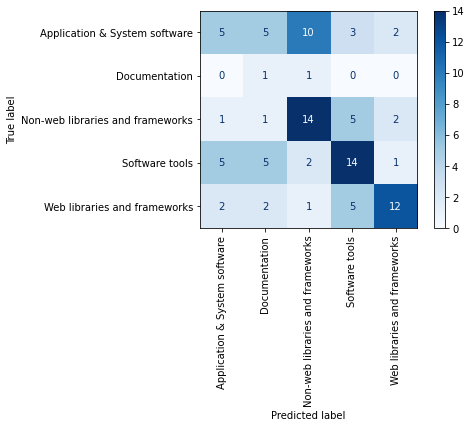

In [28]:
cnf_matrix = confusion_matrix(less_popular_df['True_label'], less_popular_df['Predicted_labels'])
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, display_labels=le.classes_).plot(cmap=plt.cm.Blues, xticks_rotation='vertical')

In [ ]:
less_popular_df.to_csv('/content/drive/MyDrive/GHDomains/Resources/less_popular_df_predicted.csv', index=False)